Alumno:  José Antonio Saenz Ramírez
Matrícula: A01793884

In [81]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Plot
import matplotlib.pyplot as plt 
import seaborn as sns 

# Medidas de tendencia Central
from statistics import mode, multimode

# Medidas de Disperción
import scipy.stats as ss

# PCA / Escalación
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

1. Descarga los datos y carga el dataset en tu libreta.

In [23]:
path="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df= pd.read_csv(path,delimiter=',')

2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [24]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [25]:
df.shape

(30000, 25)

In [26]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [27]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [29]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [30]:
# Buscamos valores nulos en el DataFrame
df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [31]:
# Rellenamos los valores nulos con la media
df.fillna(value=df.mean(),
          inplace=True)

In [32]:
# Comprobamos que ya no ha valores nulos en el DF
df.isnull().values.any()

False

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [33]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [34]:
# La media, la mediana y la moda son las medidas de tendencia central
df.mean()

ID      15000.500000
X1     167484.322667
X2          1.603753
X3          1.853057
X4          1.551903
X5         35.484214
X6         -0.016635
X7         -0.133689
X8         -0.166405
X9         -0.220800
X10        -0.266342
X11        -0.291136
X12     51236.862750
X13     49190.734669
X14     47025.350152
X15     43275.652326
X16     40324.493980
X17     38881.135745
X18      5662.945886
X19      5922.488913
X20      5225.623400
X21      4827.252526
X22      4800.297209
X23      5216.259977
Y           0.221189
dtype: float64

In [35]:
df.median()

ID      15000.5
X1     140000.0
X2          2.0
X3          2.0
X4          2.0
X5         34.0
X6          0.0
X7          0.0
X8          0.0
X9          0.0
X10         0.0
X11         0.0
X12     22400.0
X13     21228.5
X14     20108.0
X15     19066.0
X16     18123.0
X17     17100.5
X18      2100.0
X19      2010.0
X20      1800.0
X21      1500.0
X22      1500.0
X23      1500.0
Y           0.0
dtype: float64

In [55]:
df.mode(axis=0)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,50000.0,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,29999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Medidas de Dispersión: desviación standar, rango, IQR, coeficiente de variación
df.std()

ID       8660.398374
X1     129747.661567
X2          0.489117
X3          0.790293
X4          0.521950
X5          9.217256
X6          1.123773
X7          1.197154
X8          1.195908
X9          1.168977
X10         1.132994
X11         1.149865
X12     73631.715966
X13     71170.333204
X14     69345.833000
X15     64329.411150
X16     60792.752471
X17     59551.384923
X18     16561.956313
X19     23040.720074
X20     17606.074601
X21     15665.879011
X22     15278.040231
X23     17777.366677
Y           0.415034
dtype: float64

In [57]:
# Rango = valor max - valor min
df.max() - df.min()

ID       29999.0
X1      990000.0
X2           1.0
X3           6.0
X4           3.0
X5          58.0
X6          10.0
X7          10.0
X8          10.0
X9          10.0
X10         10.0
X11         10.0
X12    1130091.0
X13    1053708.0
X14    1821353.0
X15    1061586.0
X16    1008505.0
X17    1301267.0
X18     873552.0
X19    1684259.0
X20     896040.0
X21     621000.0
X22     426529.0
X23     528666.0
Y            1.0
dtype: float64

In [66]:
# Quartiles + IQR
for column in df:
    median = df[column].median()
    Q1 = df[column].quantile(q=0.25)
    Q3 = df[column].quantile(q=0.75)
    min_val = df[column].quantile(q=0)
    max_val = df[column].quantile(q=1.0)
    iqr = Q3 - Q1
    print(column, "- Quartiles:", min_val, Q1, median, Q3, max_val, " IQR=", iqr)

ID - Quartiles: 1.0 7500.75 15000.5 22500.25 30000.0  IQR= 14999.5
X1 - Quartiles: 10000.0 50000.0 140000.0 240000.0 1000000.0  IQR= 190000.0
X2 - Quartiles: 1.0 1.0 2.0 2.0 2.0  IQR= 1.0
X3 - Quartiles: 0.0 1.0 2.0 2.0 6.0  IQR= 1.0
X4 - Quartiles: 0.0 1.0 2.0 2.0 3.0  IQR= 1.0
X5 - Quartiles: 21.0 28.0 34.0 41.0 79.0  IQR= 13.0
X6 - Quartiles: -2.0 -1.0 0.0 0.0 8.0  IQR= 1.0
X7 - Quartiles: -2.0 -1.0 0.0 0.0 8.0  IQR= 1.0
X8 - Quartiles: -2.0 -1.0 0.0 0.0 8.0  IQR= 1.0
X9 - Quartiles: -2.0 -1.0 0.0 0.0 8.0  IQR= 1.0
X10 - Quartiles: -2.0 -1.0 0.0 0.0 8.0  IQR= 1.0
X11 - Quartiles: -2.0 -1.0 0.0 0.0 8.0  IQR= 1.0
X12 - Quartiles: -165580.0 3566.75 22400.0 67091.0 964511.0  IQR= 63524.25
X13 - Quartiles: -69777.0 2986.75 21228.5 64006.25 983931.0  IQR= 61019.5
X14 - Quartiles: -157264.0 2674.75 20108.0 60164.75 1664089.0  IQR= 57490.0
X15 - Quartiles: -170000.0 2332.0 19066.0 54506.0 891586.0  IQR= 52174.0
X16 - Quartiles: -81334.0 1769.5 18123.0 50177.0 927171.0  IQR= 48407.5
X17 - Qu

In [69]:
# Coeficiente de Variación
for column in df:
    cv = ss.variation(df[column])
    print(column, "- CV =", cv)

ID - CV = 0.5773310245013922
X1 - CV = 0.774672500818955
X2 - CV = 0.3049774394491947
X3 - CV = 0.42647369307507893
X4 - CV = 0.3363234010582105
X5 - CV = 0.25975219140952543
X6 - CV = -67.55361142661023
X7 - CV = -8.954623370732719
X8 - CV = -7.186591872696732
X9 - CV = -5.294202850549483
X10 - CV = -4.253835718708427
X11 - CV = -3.9495173144454343
X12 - CV = 1.4370608349002567
X13 - CV = 1.4467998394523338
X14 - CV = 1.4746233043068622
X15 - CV = 1.4864787825697892
X16 - CV = 1.507563598451301
X17 - CV = 1.5316011543899508
X18 - CV = 2.9245697579111654
X19 - CV = 3.890313075498228
X20 - CV = 3.3691255220099254
X21 - CV = 3.24524516314156
X22 - CV = 3.1826749323553063
X23 - CV = 3.4080108094044737
Y - CV = 1.8763455880079172


5. Realiza el conteo de las variables categóricas

In [72]:
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
# X2: Gender (1 = male; 2 = female). 
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# X4: Marital status (1 = married; 2 = single; 3 = others). 
# X5: Age (year). 
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 
var_cate = ['X2','X3','X4']

print("X2 value_counts: "+str(df['X2'].value_counts()))
print("X3 value_counts: "+str(df['X3'].value_counts()))
print("X4 value_counts: "+str(df['X4'].value_counts()))

X2 value_counts: 2.000000    18112
1.000000    11887
1.603753        1
Name: X2, dtype: int64
X3 value_counts: 2.000000    14030
1.000000    10585
3.000000     4915
5.000000      280
4.000000      123
6.000000       51
0.000000       14
1.853057        2
Name: X3, dtype: int64
X4 value_counts: 2.000000    15964
1.000000    13657
3.000000      323
0.000000       54
1.551903        2
Name: X4, dtype: int64


6. Escala los datos, si consideras necesario

In [75]:
# Separating out the features
X = df.loc[:, df.columns != 'Y'].values #Seleccionamos las X, separando todas las columnas, excepto la columna Y
# Separating out the target
Y = df['Y'].values #Seleccionamos las columnas en y
# Standardizing the features
X_escalada = StandardScaler().fit_transform(X) #Aqui nos cambia los encabezados de nuestras columnas
#Ahora tenemos que meter a un dataframe lo escalado
df_escalado = pd.DataFrame(X_escalada) #esto nos convierte a formato dataframe
#df_escalado = pd.DataFrame(data=df_escalado, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']) #Algo asi si queremos ponerle encabezados
df_escalado

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.731993,-1.136720,0.810140,0.185938,-1.057405,-1.245968,1.794552,1.782331,-0.697050,-0.666577,...,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426
1,-1.731878,-0.365981,0.810140,0.185938,0.858519,-1.028980,-0.875071,1.782331,0.139148,0.188886,...,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922
2,-1.731762,-0.597202,0.810140,0.185938,0.858519,-0.161028,0.014803,0.111674,0.139148,0.188886,...,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165
3,-1.731647,-0.905498,0.810140,0.185938,-1.057405,0.164454,0.014803,0.111674,0.139148,0.188886,...,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174
4,-1.731531,-0.905498,-1.234395,0.185938,-1.057405,2.334333,-0.875071,0.111674,-0.697050,0.188886,...,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,0.404759,-1.234395,1.451312,-1.057405,0.381442,0.014803,0.111674,0.139148,0.188886,...,2.326634,0.695313,-0.149486,-0.384567,0.171302,0.610994,-0.012645,-0.113641,0.013071,-0.237174
29996,1.731647,-0.134759,-1.234395,1.451312,0.858519,0.815417,-0.875071,-0.723654,-0.697050,-0.666577,...,-0.627638,-0.533150,-0.577948,-0.652911,-0.231012,-0.104013,0.214269,-0.299909,-0.314201,-0.293426
29997,1.731762,-1.059646,-1.234395,0.185938,0.858519,0.164454,3.574301,2.617659,1.811545,-0.666577,...,-0.638367,-0.348177,-0.324756,-0.327859,-0.341931,-0.257049,0.952777,-0.040040,-0.183292,-0.119044
29998,1.731878,-0.674276,-1.234395,1.451312,-1.057405,0.598430,0.904677,-0.723654,0.139148,0.188886,...,0.422219,0.147654,-0.468312,0.168981,4.844741,-0.109091,-0.229903,-0.185199,3.152532,-0.191947


7. Reduce las dimensiones con PCA, si consideras necesario

In [76]:
mi_pca = PCA(n_components = 10) #Aqui ponemos la cantidad de vectores o componentes que nos de la mayoria, en este caso a el 10 le dieron el 80%
componentes_principales = mi_pca.fit_transform(X_escalada)
 
print('Forma antes de PCA: ', X_escalada.shape)
print('Forma despues de aplicar el  PCA: ', componentes_principales.shape)
 
#Hacemos un nuevo dataframe que ponemos el orden de las columnas que deseemos, porque el pca, queda sin encabezado
df_con_pca = pd.DataFrame( data=componentes_principales, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
#Aqui dejamos solamente las columnas que indiquemos en la linea 3, si ponemos 8, dejar solo 8 columnas

# Las etiquetas de nuestas variables objetivo osea las y, las ponemos a gusto
target_names = {0.0:'Ladron',1.0:'No ladron'}
 
df_con_pca['Y'] = Y #aqui estamos a;adiendo la columna de y a nuestro dataframe que contiene el PCA 
#el .map, mapea los valores, con un diccionario dado, osea que cuando coincida un valor de esa columna, con un valor del diccionario target names, entoences sustituira el valor
df_con_pca['Y'] = df_con_pca['Y'].map(target_names) #Y aqui sustituimos la columna y, con 
 
df_con_pca.head()

print(mi_pca.explained_variance_ratio_) # usamos el atributo explained etc, para que nos explique la contibucion de cada componente, par que sepamos las sumatorias de porcentajes
mi_pca.explained_variance_ratio_.sum() #Esta nos dara la sumatoria de la cantidad de componentes elegidos, para moverle en la linea 2
df_con_pca

Forma antes de PCA:  (30000, 24)
Forma despues de aplicar el  PCA:  (30000, 10)
[0.27262814 0.1708037  0.06470636 0.06140222 0.04366079 0.04106471
 0.03956639 0.03780478 0.03696943 0.03629662]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Y
0,-1.899819,-0.945019,-0.378366,-0.641519,-0.188393,-1.783363,0.927364,-0.494813,0.220494,-0.253958,No ladron
1,-0.776972,-2.148734,1.199100,-0.546531,-0.194730,-1.637943,0.525060,0.168713,0.188225,-0.207649,No ladron
2,-0.859296,-1.111687,0.517333,-0.515439,-0.315915,-1.583676,0.806033,-0.030010,0.010675,-0.212888,Ladron
3,-0.208204,-0.848400,-0.723996,0.181109,-0.318533,-1.878023,0.597673,0.360409,0.055782,0.051954,Ladron
4,-0.852356,-0.111290,-0.943386,2.200658,-1.859324,-0.427648,1.284937,0.837009,0.254928,0.536029,Ladron
...,...,...,...,...,...,...,...,...,...,...,...
29995,2.534862,0.731402,-1.764461,0.557037,0.628460,1.906678,0.589055,-0.363447,-0.710683,0.321522,Ladron
29996,-1.764310,-0.010414,-0.529504,0.616481,0.622690,2.313206,0.648460,-0.333723,0.128830,-0.065629,Ladron
29997,0.367650,-3.273787,0.497145,0.581563,0.118537,2.288209,-0.270626,-0.773773,0.544753,-0.425602,No ladron
29998,0.661877,0.762099,0.369881,2.981905,0.696629,1.620468,1.035004,-1.826734,-0.755567,1.832776,No ladron


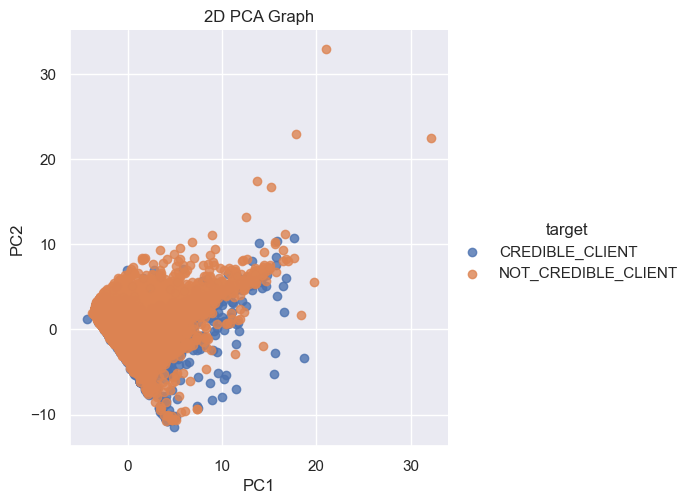

In [89]:
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
columnas_pca = pca.fit_transform(X_escalada)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=columnas_pca, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0.0:'NOT_CREDIBLE_CLIENT',
    1.0:'CREDIBLE_CLIENT'
}
 
pca_df['target'] = Y
pca_df['target'] = pca_df['target'].map(target_names)
 
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [78]:
# Varianza
mi_pca.explained_variance_

array([6.54329339, 4.09942544, 1.55300449, 1.47370239, 1.04789397,
       0.98558577, 0.949625  , 0.90734486, 0.88729598, 0.87114803])

8. Elabora los histogramas de los atributos para visualizar su distribución

In [79]:
#df_escalado.columns.to_list()
df_escalado.columns

RangeIndex(start=0, stop=24, step=1)

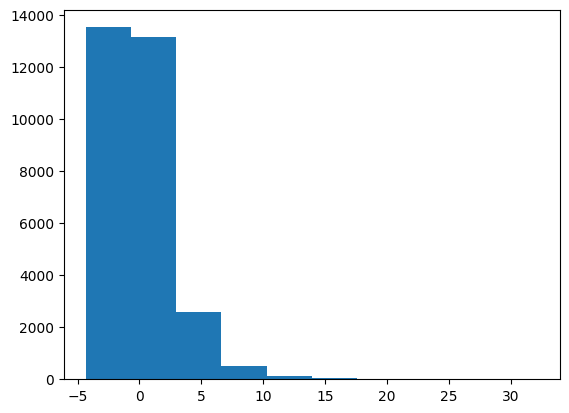

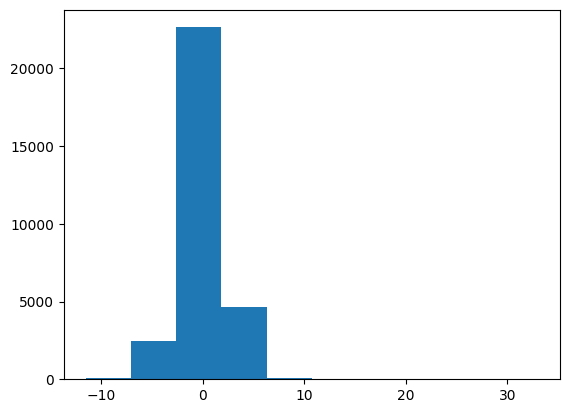

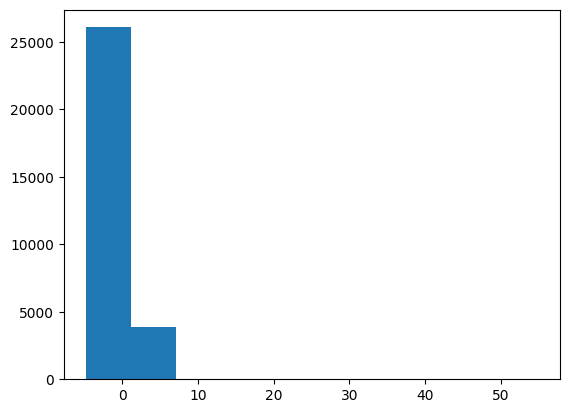

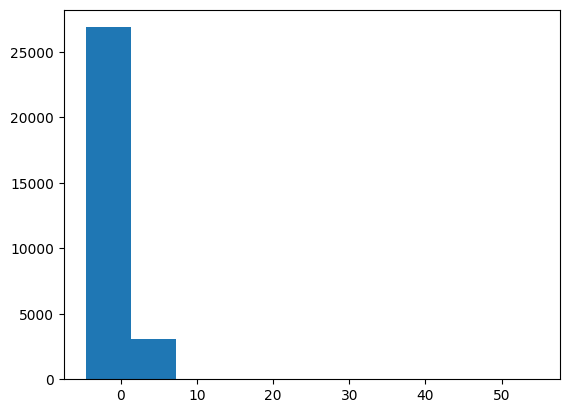

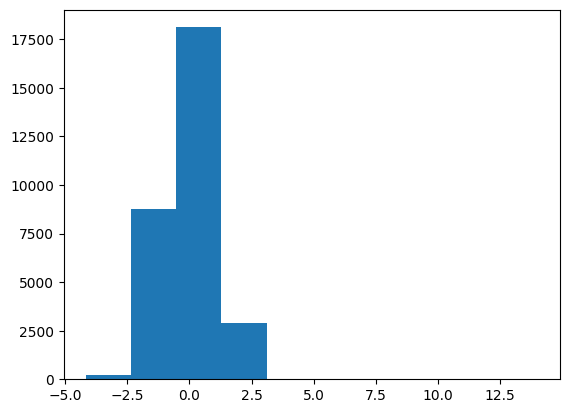

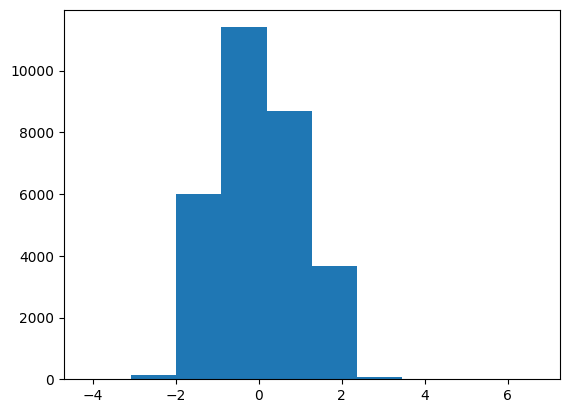

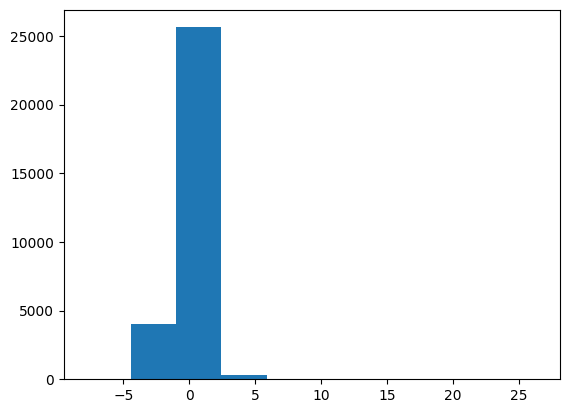

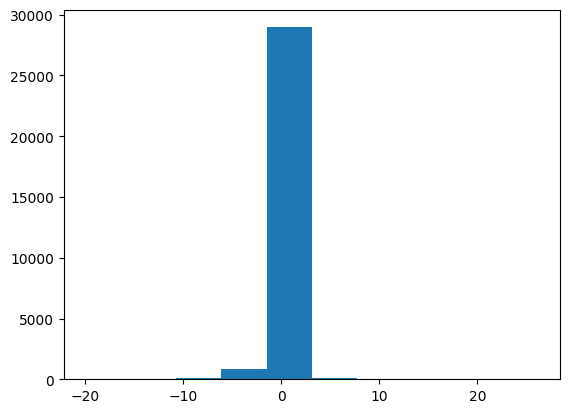

In [82]:
# 1
plt.hist(df_con_pca['PC1'])
plt.show()
plt.hist(df_con_pca['PC2'])
plt.show()
plt.hist(df_con_pca['PC3'])
plt.show()
plt.hist(df_con_pca['PC4'])
plt.show()
plt.hist(df_con_pca['PC5'])
plt.show()
plt.hist(df_con_pca['PC6'])
plt.show()
plt.hist(df_con_pca['PC7'])
plt.show()
plt.hist(df_con_pca['PC8'])
plt.show()

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

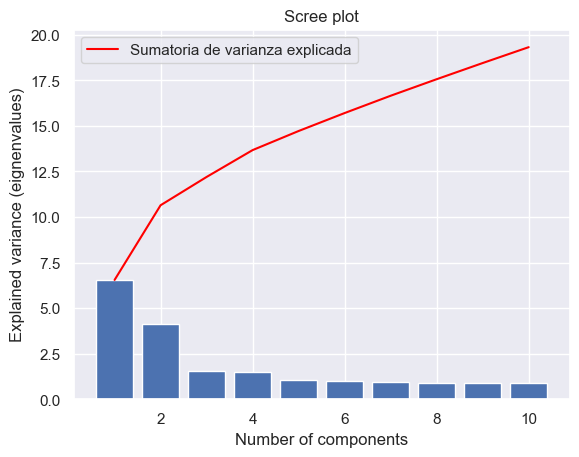

In [84]:
#Selecionamos 3 gaficos de cualquiera de estas plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

sns.set()
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(mi_pca.explained_variance_)+1),
    mi_pca.explained_variance_
    )
 
plt.plot(
    range(1,len(mi_pca.explained_variance_)+1),
    np.cumsum(mi_pca.explained_variance_),
    c='red',
    label='Sumatoria de varianza explicada')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

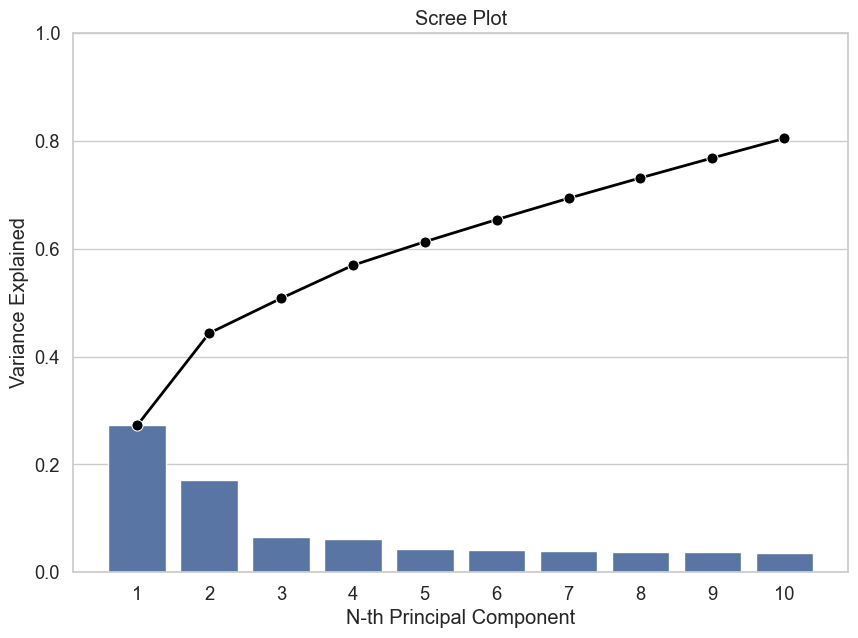

In [85]:
PC_components = np.arange(mi_pca.n_components_) + 1

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = mi_pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(mi_pca.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0,1)
plt.show()

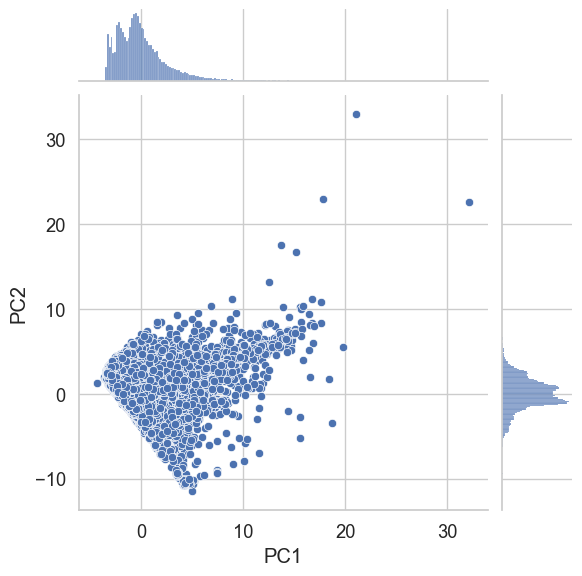

In [87]:
sns.jointplot(x = "PC1", y = "PC2", kind = "scatter", data = df_con_pca)
plt.show()

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

* Scree Plot: Este gráfico es útil para determinar el PCA (Análisis de componentes principales). En un diagrama de sedimentación en el cual los valores propios siempre están en una curva descendente. Ordena los valores en orden descendente para poder determinar el peso de los componentes principales.

* Joint Plot: comprende tres plots en realidad, el primero mostrará el gráfico bivariado, mostrando cómo variará la variable dependiente con la variable independiente. La gráfica en la parte superior del gráfico bivariado es el que muestra la distribución de la variable dependiente. El tercer gráfico se coloca a la derecha del gráfico bivariado. Es muy útil dibujar el univariado y bivariado juntos en un solo gráfico. El análisis se centra en una sóla variable y describirá resúmenes y mostrará patrones.

* Bar Plot: Es un gráfico que representa la categoría de datos con barras rectangulares con longitudes y alturas proporcionales a los valores que representan. Este gráfico describe las comparaciones entre las categorías discretas. Uno de los ejes del gráfico representa las categorías específicas que se comparan, mientras que el otro eje representa los valores medidos correspondientes a esas categorías.
